In [56]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/Zip_zori_sm_month.csv')
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-03-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1497.424718,...,1842.220063,1868.047131,1873.817718,1878.928788,1858.462009,1840.580666,1837.859685,1866.420457,1878.317284,1879.541555
1,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1277.132974,...,1751.848602,1802.897432,1844.663002,1839.843822,1817.949304,1784.282291,1780.857238,1772.767233,1782.596162,1792.935784
2,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,1213.896723,...,1829.508574,1855.754040,1844.563025,1836.608744,1829.236068,1832.788915,1818.796956,1825.326246,1824.967456,1828.388042
3,62093,5,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2002.268262,...,2690.483038,2767.820061,2844.072074,2850.187383,2849.302473,2818.582220,2771.866885,2723.280995,2722.922736,2746.429739
4,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1273.463572,1319.020253,1352.624832,1364.329298,1341.859387,1352.863897,1360.447722,1397.850669,1414.703422,1412.378205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6371,88839,27256,70836,zip,LA,LA,Baton Rouge,"Baton Rouge, LA",East Baton Rouge Parish,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1306.666667
6372,62281,27793,11930,zip,NY,NY,Amagansett,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,...,NaN,NaN,24931.420268,21668.102634,24107.990438,23901.103350,25276.735012,32484.601391,45075.032800,60592.444444
6373,60648,28289,7311,zip,NJ,NJ,Jersey City,"New York-Newark-Jersey City, NY-NJ-PA",Hudson County,NaN,...,3764.270779,3885.981484,3937.951966,3900.895821,3801.104329,3745.986117,3728.190602,3731.656552,3737.212657,3741.898413
6374,418163,31650,89158,zip,NV,NV,Las Vegas,"Las Vegas-Henderson-Paradise, NV",Clark County,NaN,...,NaN,NaN,NaN,NaN,NaN,3651.520243,3707.929459,3996.015315,3945.173817,3983.000000


In [33]:
def get_rent_evolution_by_zip(zip_code):
    df_zip = df[df['RegionName'] == int(zip_code)]
    df_zip = df_zip.iloc[:, 9:]
    df_zip = df_zip.T
    df_zip.index = pd.to_datetime(df_zip.index)
    # print(df_zip.head())
    df_zip.columns = ['rent_index']
    df_zip['evolution'] = df_zip['rent_index'].pct_change()
    df_zip['index_norm'] = df_zip['rent_index']/df_zip['rent_index'][0]
    return df_zip

Volatility of rent index:  4.07 %
Average rent index growth:  0.24
Sharp ratio:  0.69


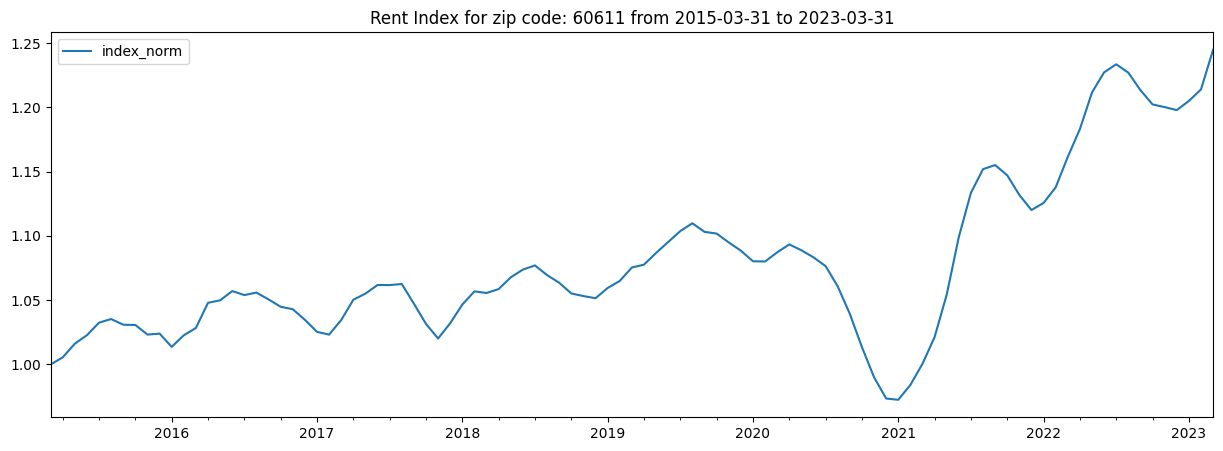

In [73]:
zip_code = '60611'
df_zip = get_rent_evolution_by_zip(zip_code)
begin_date = df_zip.index[0].strftime('%Y-%m-%d')
end_date = df_zip.index[-1].strftime('%Y-%m-%d')
df_zip[['index_norm']].plot(figsize=(15, 5), title=f'Rent Index for zip code: {zip_code} from {begin_date} to {end_date}')
print('Volatility of rent index: ', round(df_zip['evolution'].std()*100 *np.sqrt(12),2), '%')
print('Average rent index growth: ', round(df_zip['evolution'].mean()*100,2))
print('Sharp ratio: ', round(df_zip['evolution'].mean()/df_zip['evolution'].std()*np.sqrt(12),2))

'2015-03-31'